# Classification of cells from Masaeli et al.

**Please indicate at the top of your assignment whether or not you used any AI tools, such as MS Copilot. If you did use one of these tools, please provide a very brief explanation alongside each answer for how you confirmed the correctness of your solution.**

We're going to reimplement an SVM model from a [Di Carlo lab's study of the mechanical properties of cells](https://www.nature.com/articles/srep37863). With this, we'll then explore some of its properties.

No I did not use AI

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import label_binarize

mat = pd.read_csv('WBC.csv')
mat.drop('Unnamed: 0', axis=1, inplace=True)
X = mat.iloc[:, :-1]
y = mat.iloc[:, -1]

In [4]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19
0,7.705763,0.991449,0.023529,41.733333,1.048193,43.5,5,68.713823,0.781410,0.869809,41.605769,5.0,0.999950,50.6,11,56.8,9,5,0.000000
1,296.676531,3.069244,0.515789,55.275000,3.130435,108.0,155,271.802401,0.885943,0.820493,56.551683,5.0,0.893470,76.3,8,668.3,9,25,0.037783
2,537.484884,1.001452,0.058824,42.800000,1.125000,40.5,280,75.633843,0.843340,0.835149,42.076923,5.0,0.999243,50.5,7,36.6,11,3,0.000000
3,701.235607,1.130061,0.107527,46.266667,1.240964,51.5,365,90.187681,0.705554,0.846169,47.645833,5.0,0.999204,60.4,6,62.7,7,11,0.021176
4,720.500015,0.995128,0.023256,39.875000,1.047619,44.0,375,65.618147,0.847418,0.831938,44.894231,4.5,0.989088,73.4,9,40.5,8,7,0.000000


In [5]:
y.value_counts()

Sample
WBC     8629
MCF7    1157
HL60     322
Name: count, dtype: int64

#### (1) Choose any two variables and plot them against cell identity (in color). Do you see clear separation of these classes? What does this tell you about whether or not you can classify the cells of differing type?

Although it seems that we can observe that MCF7 highly concentrates at V2=0.5-2.5, it overlaps with the other two cell types in general, and this tells that we cannot easily separate or classify cell types.

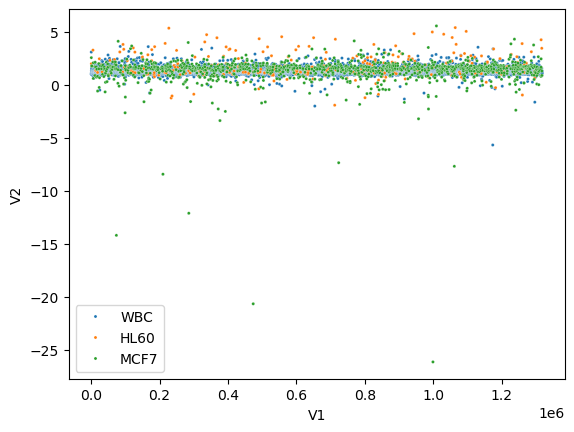

In [8]:
# Answer
import seaborn as sns

X_Y = pd.concat([X,y], axis=1)

sns.scatterplot(
   x="V1",
   y="V2",
   data=X_Y,
   hue='Sample',
   s=5    
)
plt.legend()

#### (2) Use principal components analysis to visualize the variation in each variable. Plot the first two principal components against the cell type. Do you see better separation in this case? What does this tell you about your ability to distinguish the cell types?

There is a slightly better differentiation between the blue class (WBC) with the other two cell classes, but still there are much overlap between the other two type cells, and this tells us it is still difficult to separate among all the cell types, though it may be slightly easier to distinguish WBC from the other two cell types as compared to above plot.

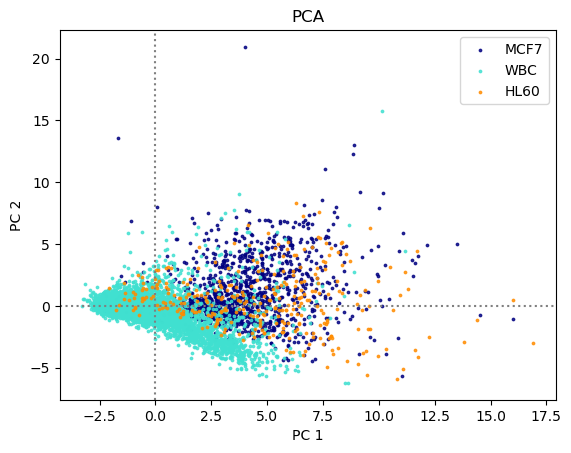

In [11]:
# Answer
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, NMF

X_scale = scale(X)
pca = PCA(n_components=2)
X_r = pca.fit_transform(X_scale)

colors = ['navy', 'turquoise', 'darkorange']
target_names = list(set(y.to_list()))

for color, target_name in zip(colors, target_names):
    plt.scatter(X_r[y == target_name, 0], X_r[y == target_name, 1], color=color, alpha=.8, label=target_name, s=3)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA')
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.axhline(y=0, color='grey', linestyle='dotted')
plt.axvline(x=0, color='grey', linestyle='dotted')

#### (3) Plot the loadings for the first two principal components. What do these tell you about the relative differences among the cells in (2)?

From the loadings, V9/V10 are negatively weighed along PC1 & PC2, V17 are negatively weighed along PC1; V13 is negatively weighed along PC1 & positively weighed along PC2; V2/V18/V5/V16/V6/V3 are negatively weighed along PC2 & positively weighed along PC1; V19 and V8 are positively weighed along PC1; V1 and V7 are positively weighed along PC2; V12/V4/V11/V14 are positively weighed along PC1 & PC2.
There is a clearer differentiation between WBC and the other two cell types in the right side of the above plot in the way that WBC is concentrated at a more negative location along PC2. This tells that WBC is higher in V2/V18/V5/V16/V6/V3, while MCF7 & HL60 are higher in V12/V4/V11/V14.

Text(0.5, 1.0, 'Loading plot')

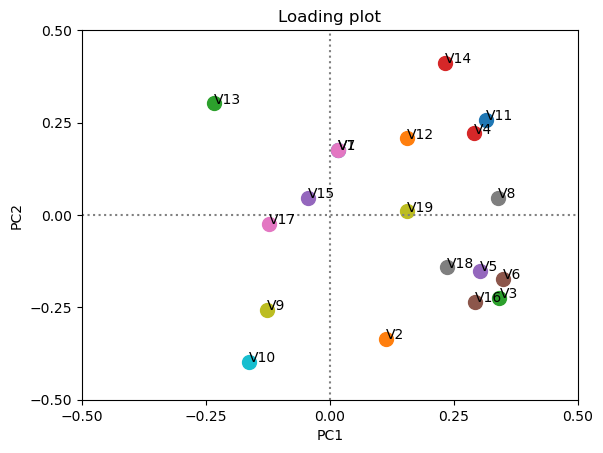

In [14]:
# Answer.
loadings = pca.components_
# Get the loadings of x and y axes
xs = loadings[0]
ys = loadings[1]
 
# Plot the loadings on a scatterplot
for i, varnames in enumerate(X.columns):
    plt.scatter(xs[i], ys[i], s=100)
    plt.text(xs[i], ys[i], varnames)
    
xticks = np.linspace(-0.5, 0.5, num=5)
yticks = np.linspace(-0.5, 0.5, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.axhline(y=0, color='grey', linestyle='dotted')
plt.axvline(x=0, color='grey', linestyle='dotted')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Loading plot')

In [187]:
loadings.shape

(2, 19)

#### (4) How does partial least squares regression fare in discriminating cancer and non-cancer cells (this is called PLS-DA)? How are these results similar or different to those in the previous question?

The visualized results are similar to those in previous question in terms of the relative position of cancer cells (MCF7 & HL60) and non-cancer cells (WBC), which is located more negatively along PC2 compared to non-cancer cells in the right side of the plot. Since MCF7 and HL60 are grouped to cancer cells this time, it is easier to differentiate the two classes (cancer and non-cancer cells) in this plot.

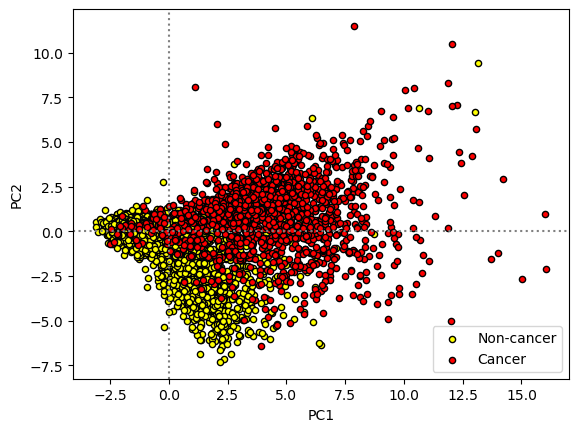

In [17]:
# This makes cancer=1 and not cancer=0
y_binary = np.logical_not(label_binarize(y, classes=['WBC', 'HL60', 'MCF7'])[:, 0])

# Answer
from itertools import compress
from sklearn.cross_decomposition import PLSRegression

plsr = PLSRegression(n_components=2)
# Fit
plsr.fit(X_scale, y_binary)
# Predict
y_pred = plsr.predict(X_scale)

scores = plsr.x_scores_


# Create the score plot
labels=["Non-cancer","Cancer"]
color_map = dict(zip(labels, ["Yellow", "Red"]))


for idx, label in enumerate(labels):
    selectors = [y == idx for y in y_binary]
    score_0 = list(compress(scores[:, 0], selectors))
    score_1 = list(compress(scores[:, 1], selectors))
    plt.scatter(score_0, score_1, label=label, c=color_map[label], edgecolors= "black", s=20)
    
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axhline(y=0, color='grey', linestyle='dotted')
plt.axvline(x=0, color='grey', linestyle='dotted')


#### (5) Setup a support vector machine classifier (with linear kernel) to distinguish cancer and non-cancer.

Evaluate how well this performs.

We can evaluate by cross validation score and it gives a result of 97% accuracy.

In [129]:
# Answer
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.svm import SVC # "Support vector classifier"

svm = SVC(kernel='linear', C=1)
# model.fit(X_scale, y_binary)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
kfold = KFold(n_splits=5, shuffle=True, random_state=7)
results = cross_val_score(svm, X_scale, y_binary, cv=skf) #Cross validation

In [130]:
print("Cross validated accuracy score: {}".format(np.mean(results)))

Cross validated accuracy score: 0.9706173702337132


#### (6) Why might an alternative kernel, like `rbf`, be more effective in this application?

Alternative kernal like rbf can allow the SVM to create complex decision boundaries that can effectively separate non-linearly separable data, while a linear SVM is limited to finding a straight line separation and this may be less effective in this application, where we can observe the boundary between the two classes is not a entirely linear one. Below calculated CV score is slightly improved than above one with linear kernel.

In [133]:
# Answer
svm = SVC(kernel='rbf', C=1)

results = cross_val_score(svm, X_scale, y_binary, cv=skf) #Cross validation

print("Cross validated accuracy score: {}".format(np.mean(results)))

Cross validated accuracy score: 0.9718045585643521


#### (7) Vary the radius parameter of your kernel and evaluate the ability of it to descriminate data both when fitting and on cross-validation.

Is the choice of the best radius different based on whether you are performing cross-validation?

Yes, it varies based on determination on fitting or CV. CV give the best gamma at 0.0158, which is small, while fitting on whole dataset give the best gamma at 1000 (the largest available on within the given gamma range). Such best gamma on fitting results in a perfect training accuracy score. This can be interpreted in the way that when gamma is large, the decision boundary will be very tight around individual data points. This can lead to overfitting, resulting in poor generalization to unseen data. Since using fitting data to perform hyperparameter tuning miss the process of evaluating the fitted model on unseen data as in CV, it will always look for a gamma as large as possible in order to perfectly fit all data points in the training dataset. On the other hand, in CV, the concept of bias-variance tradeoff is showcased here and it can effectively assess the generalization performance of a model. Thus, the best gamma tuned by CV will instead lead to a better generalization performance of a model.

In [135]:
# Answer
gamma_range = np.logspace(-9, 3, 26)
param_grid = dict(gamma=gamma_range)

svm = SVC(kernel='rbf', C=1)
grid = GridSearchCV(svm, param_grid=param_grid, cv=skf)
grid.fit(X_scale, y_binary)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=7, shuffle=True),
             estimator=SVC(C=1),
             param_grid={'gamma': array([1.00000000e-09, 3.01995172e-09, 9.12010839e-09, 2.75422870e-08,
       8.31763771e-08, 2.51188643e-07, 7.58577575e-07, 2.29086765e-06,
       6.91830971e-06, 2.08929613e-05, 6.30957344e-05, 1.90546072e-04,
       5.75439937e-04, 1.73780083e-03, 5.24807460e-03, 1.58489319e-02,
       4.78630092e-02, 1.44543977e-01, 4.36515832e-01, 1.31825674e+00,
       3.98107171e+00, 1.20226443e+01, 3.63078055e+01, 1.09647820e+02,
       3.31131121e+02, 1.00000000e+03])})

In [136]:
print(
    "CV method: The best parameter is {} with a score of {:0.4f}".format(
    grid.best_params_, grid.best_score_)
)

CV method: The best parameter is {'gamma': 0.01584893192461111} with a score of 0.9732


In [137]:
from sklearn.metrics import accuracy_score
best_score = 0
best_gamma = -1000

for gamma in gamma_range:
    svm = SVC(kernel='rbf', C=1, gamma=gamma)
    svm.fit(X_scale, y_binary)
    result = accuracy_score(y_binary, svm.predict(X_scale))
    if result >= best_score:
        best_score = result
        best_gamma = gamma

In [138]:
accuracy_score(y_binary, svm.predict(X_scale))

1.0

In [139]:
print(
    "Fitting method: The best parameter is gamma = {} with a score of {:0.4f}".format(
    best_gamma, best_score)
)

Fitting method: The best parameter is gamma = 1000.0 with a score of 1.0000


#### (8) Your experimental collaborator asks you how many cells she needs to collect to build a classifier with 80% accuracy. Determine this number empirically.

From the result, we can see that when sample size = 11, average CV accuracy score derived from bootstrapping is slightly above 80%, and it further increases with increasing sample size. To acheive a classifier with 80% accuracy, we can suggest to the collaborator can collect 11 cells.

In [182]:
# Answer
from sklearn.utils import resample

sample_size_range = np.arange(11,31)
dict_result = {key: None for key in sample_size_range}

skf_2 = StratifiedKFold(n_splits=2, shuffle=True)

for n in sample_size_range:
    result_list = []
    # bootstrap
    for _ in range(50):
        resamp = resample(range(X_scale.shape[0]), replace=True, n_samples=n, stratify=y_binary)
        X_scale_temp = X_scale[resamp]
        y_binary_temp = y_binary[resamp]
        svm = SVC(kernel='rbf', C=1, gamma=grid.best_params_['gamma'])
        # svm.fit(X_scale_temp, y_binary_temp)
        # result = accuracy_score(y_binary, svm.predict(X_scale))
        result = cross_val_score(svm, X_scale_temp, y_binary_temp, cv=skf_2) #Cross validation
        # save cross validation result
        result_list.append(np.mean(result))

    # save averaged bootstrapping result for sample size = n
    dict_result[n] = np.mean(result_list)
    
dict_result

{11: 0.8166666666666668,
 12: 0.8333333333333335,
 13: 0.8452380952380952,
 14: 0.857142857142857,
 15: 0.8660714285714287,
 16: 0.875,
 17: 0.8819444444444444,
 18: 0.8399999999999999,
 19: 0.8477777777777775,
 20: 0.8590000000000001,
 21: 0.8630909090909091,
 22: 0.8681818181818183,
 23: 0.875757575757576,
 24: 0.8516666666666666,
 25: 0.8548717948717949,
 26: 0.8576923076923078,
 27: 0.8648901098901098,
 28: 0.8664285714285712,
 29: 0.8714285714285714,
 30: 0.8800000000000001}

#### (9) You want to save your fit model, but want to reduce it so that you don't have to carry around all the data points. Which points could you remove and still have the same SVM model in the end?

We can remove data points which are not considered "support vectors". Support vectors are located closest to the decision boundary and serves as the data points which actually influence the decision boundary of the model. Therefore, removing other data points will not actually influence the model. In coding, we can make use of support_vectors_ attribute of the fitted model to determine which points are considered support vectors, and we can then remove other data points.